# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_1674/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

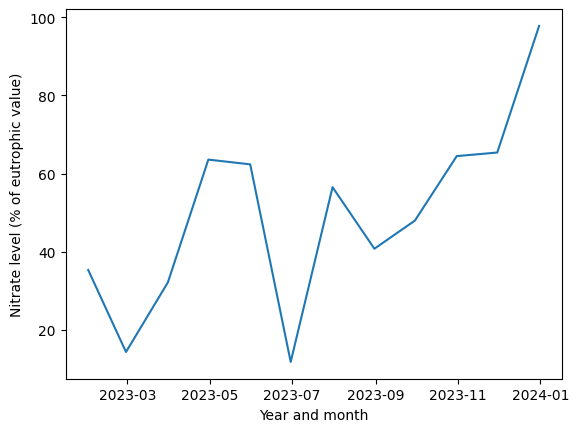

In [4]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

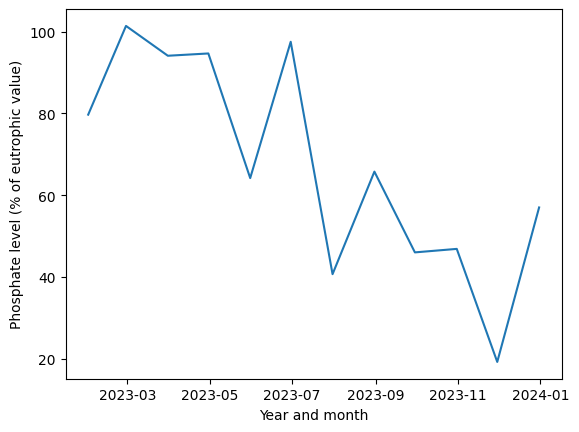

In [5]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

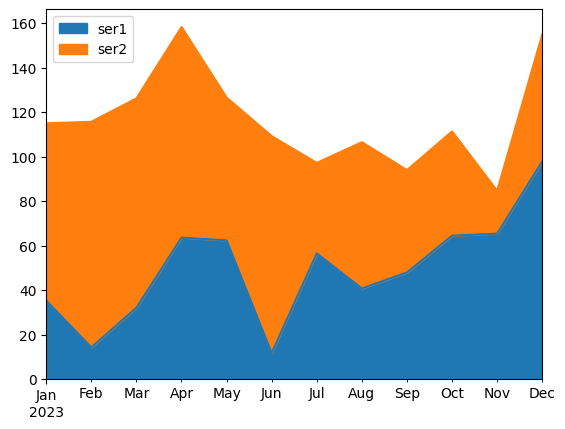

In [6]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

**Pros of an Area Plot:**  
- Shows total nutrient levels more clearly.  
- Makes trends easier to compare.  
- Visually engaging.  

**Cons of an Area Plot:**  
- Can obscure individual trends if stacked.  
- Harder to read overlaps.  
- Less precise for exact values.  

**How to Improve the Graphs:**  
- Use a dual-axis line chart for clarity.  
- Adjust opacity in an area plot to show both layers.  
- Normalize values if they’re on different scales.  
- Add clear labels and legends for better readability.  

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

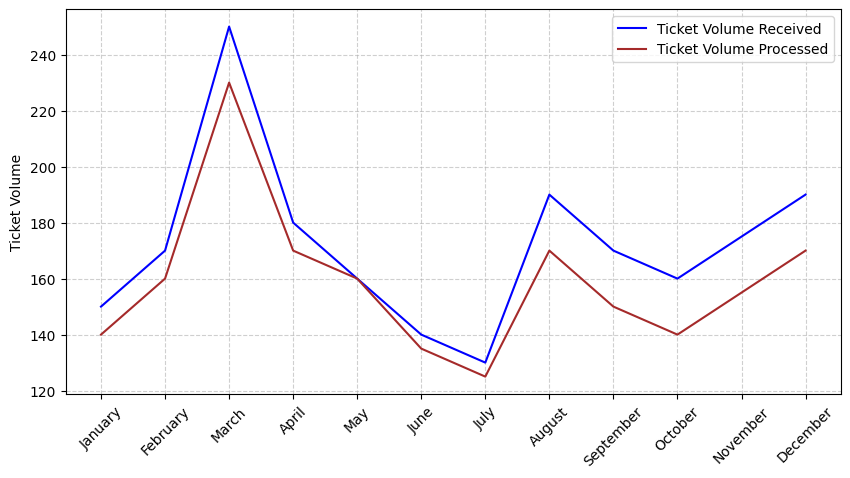

In [5]:
import matplotlib.pyplot as plt
import numpy as np

months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
ticket_received = [150, 170, 250, 180, 160, 140, 130, 190, 170, 160, 175, 190]
ticket_processed = [140, 160, 230, 170, 160, 135, 125, 170, 150, 140, 155, 170]

plt.figure(figsize=(10, 5))
plt.plot(months, ticket_received, label="Ticket Volume Received", color="blue")
plt.plot(months, ticket_processed, label="Ticket Volume Processed", color="brown")

plt.xticks(rotation=45)
plt.ylabel("Ticket Volume")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()
